# Task 2.3: Classification with LSTM

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(104)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "LSTM",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_pred_lstm")

### Load saved config

In [4]:
config = load_train_config("config_default_class_lstm")
print(config)

Config loaded from: config/config_default_class_lstm.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3106, val loss: 2.3022, val acc: 0.1091
  Epoch: 50,  train loss: 2.3019, val loss: 2.3018, val acc: 0.0757
  Epoch: 100,  train loss: 2.2912, val loss: 2.2996, val acc: 0.0845
  Epoch: 150,  train loss: 2.3019, val loss: 2.2960, val acc: 0.1146
  Epoch: 200,  train loss: 2.2940, val loss: 2.2920, val acc: 0.1419
  Epoch: 250,  train loss: 2.2913, val loss: 2.2872, val acc: 0.1662
  Epoch: 300,  train loss: 2.2844, val loss: 2.2812, val acc: 0.1500
  Epoch: 350,  train loss: 2.2800, val loss: 2.2734, val acc: 0.1834
  Epoch: 400,  train loss: 2.2830, val loss: 2.2624, val acc: 0.2340
  Epoch: 450,  train loss: 2.2736, val loss: 2.2485, val acc: 0.3258
  Epoch: 500,  train loss: 2.2507, val loss: 2.2321, val acc: 0.3051
  Epoch: 550,  train loss: 2.2541, val loss: 2.2118, val acc: 0.3011
  Epoch: 600,  train loss: 2.2475, val loss: 2.1879, val acc: 0.2920
  Epoch: 650,  train loss: 2.2520, val loss: 2.1597, val acc: 0.2982
  Epoch: 700,  train loss: 2.1

### Analysis

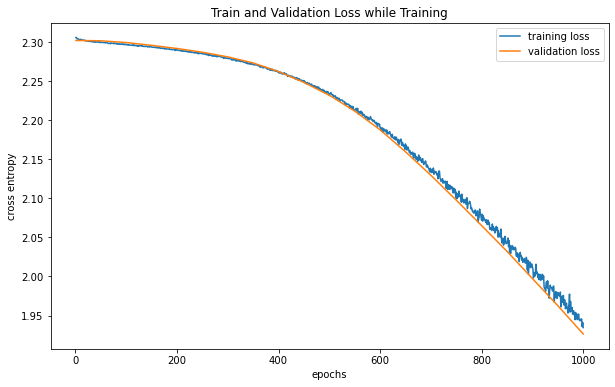

In [7]:
fl.plot_training_loss()

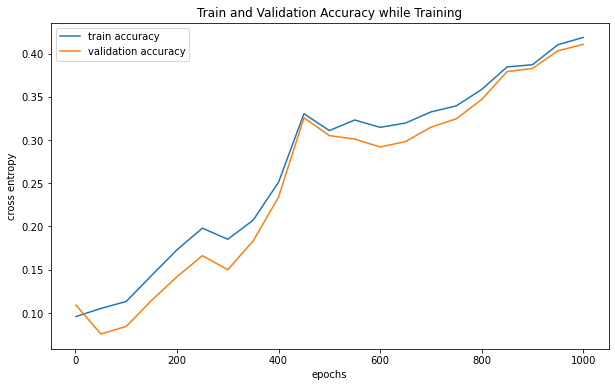

In [8]:
fl.plot_training_accuracy()

In [9]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.9384
  Accuracy:           0.4296
  Precision (micro):  0.4296
  Recall (micro):     0.4296
  F1 Score (micro):   0.4296
  Precision (macro):  0.4426
  Recall (macro):     0.413
  F1 Score (macro):   0.3756


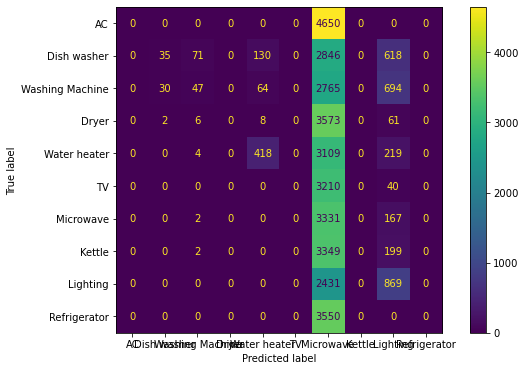

In [12]:
fl.plot_confusion_matrix(x_test, y_test)

## Run training with aggregated data

In [10]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [11]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3059, val loss: 2.3023, val acc: 0.1160
  Epoch: 50,  train loss: 2.2989, val loss: 2.3000, val acc: 0.1449
  Epoch: 100,  train loss: 2.2990, val loss: 2.2986, val acc: 0.1430
  Epoch: 150,  train loss: 2.2952, val loss: 2.2970, val acc: 0.0774
  Epoch: 200,  train loss: 2.2859, val loss: 2.2970, val acc: 0.0957


KeyboardInterrupt: 

### Analysis

In [ ]:
fl_agg.plot_training_loss()

In [ ]:
fl_agg.plot_training_accuracy()

In [ ]:
fl_agg.evaluation_metrics(x_test, y_test)

In [ ]:
fl_agg.plot_confusion_matrix(x_test, y_test)